HR ANALYTICS CASE

Project Description-
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. 
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. 

Features-Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber etc, 
Label- Attrition

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Reading dataset
data=pd.read_csv("https://raw.githubusercontent.com/Mishra35nivedita/Internship/main/Evaluation%20project-First%20phase/HR%20Analytics.csv")

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking random samples to gain better understanding about the data
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
548,43,No,Travel_Frequently,775,Sales,15,3,Life Sciences,1,754,...,3,80,1,7,5,3,2,2,2,2
1386,26,No,Travel_Rarely,157,Research & Development,1,3,Medical,1,1952,...,4,80,0,8,6,2,7,7,7,6
827,28,No,Travel_Frequently,773,Research & Development,6,3,Life Sciences,1,1154,...,4,80,1,3,2,3,3,1,0,2
1077,29,Yes,Travel_Rarely,224,Research & Development,1,4,Technical Degree,1,1522,...,3,80,0,11,2,1,9,7,0,7
175,56,No,Travel_Rarely,713,Research & Development,8,3,Life Sciences,1,241,...,3,80,1,19,3,3,2,2,2,2
345,23,No,Travel_Rarely,1309,Research & Development,26,1,Life Sciences,1,465,...,3,80,2,4,2,2,4,2,0,2
40,35,No,Travel_Rarely,464,Research & Development,4,2,Other,1,53,...,3,80,1,1,3,3,1,0,0,0
387,40,No,Travel_Rarely,759,Sales,2,2,Marketing,1,516,...,3,80,2,8,5,3,5,4,1,3
360,57,No,Travel_Rarely,593,Research & Development,1,4,Medical,1,482,...,3,80,0,15,2,3,3,2,1,2
561,52,No,Travel_Rarely,621,Sales,3,4,Marketing,1,776,...,1,80,0,34,3,4,34,6,1,16


In [5]:
#Checking shape of dataset
data.shape

(1470, 35)

In [6]:
#Checking datatype and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that Attrition,BusinessTravel,Department,EducationField,Gender,JobRole, MaritalStatus, Over18 and OverTime have object type data and remaining columns have integers.

In [21]:
#Verifying for nulls
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values for any of the columns

In [24]:
#Checking unique values in each column
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

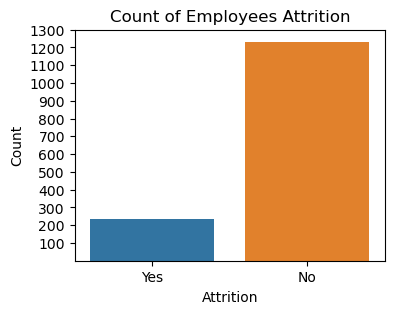

In [31]:
#Let's check counts of Yes and No rates in Attrition graphically-
plt.figure(figsize=(4,3))
sns.countplot(x='Attrition',data=data)
plt.yticks(range(100,1400,100))
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Count of Employees Attrition")
plt.show()


The Attrition rate is not as high as the rate of employees who have been retained.

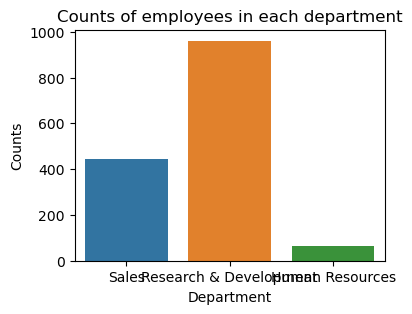

In [32]:
#Checking Department counts
plt.figure(figsize=(4,3))
sns.countplot(x="Department",data=data)
plt.xlabel("Department")
plt.ylabel("Counts")
plt.title("Counts of employees in each department")
plt.show()

The highest number of employees are in Research and Development, then comes Sales and Human Resources have the lowest number of employees

Text(0.5, 1.0, 'Employee count in education')

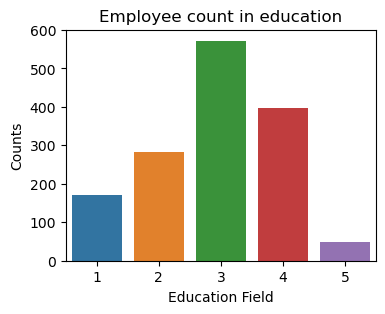

In [34]:
#Checking counts in education.
plt.figure(figsize=(4,3))
sns.countplot(x='Education',data=data)
plt.xlabel('Education Field')
plt.ylabel('Counts')
plt.title('Employee count in education')


Text(0.5, 1.0, 'Count of satisfaction rate')

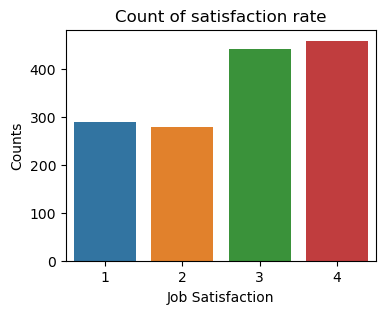

In [38]:
#Let's check how satisfied employees are
plt.figure(figsize=(4,3))
sns.countplot(x="JobSatisfaction", data=data)
plt.xlabel('Job Satisfaction')
plt.ylabel('Counts')
plt.title('Count of satisfaction rate')



The number of employees with satisfaction rate of 3 and 4 is higher than employees with satisfaction rate of 1 and 2 which implies to good satisfaction in job.

Text(0.5, 1.0, 'Count of employees in each Gender')

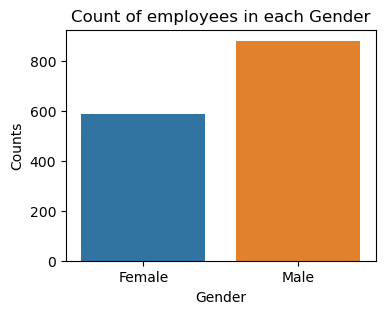

In [36]:
#Checking gender count
plt.figure(figsize=(4,3))
sns.countplot(x="Gender", data=data)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Count of employees in each Gender')

There are more male employees than female.

Text(0.5, 1.0, 'Count of employees Married/unmarried/divorced')

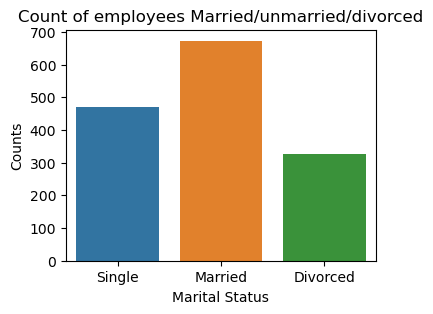

In [39]:
#Checking counts of marital status
plt.figure(figsize=(4,3))
sns.countplot(x="MaritalStatus", data=data)
plt.xlabel('Marital Status')
plt.ylabel('Counts')
plt.title('Count of employees Married/unmarried/divorced')

The number of married employees are more in comparison to Single and divorced

Text(0.5, 1.0, 'Count of employees according to Work Life Balance')

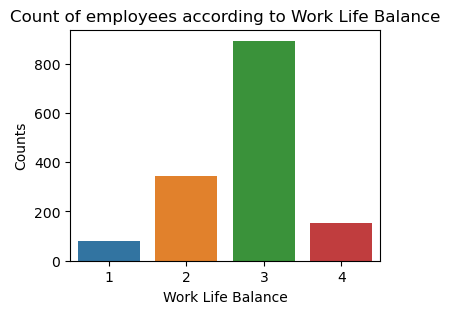

In [42]:
#Checking worklife balance
plt.figure(figsize=(4,3))
sns.countplot(x="WorkLifeBalance", data=data)
plt.xlabel('Work Life Balance')
plt.ylabel('Counts')
plt.title('Count of employees according to Work Life Balance')

More number of employees seem to have good work life balance.

Text(0.5, 1.0, 'Performance Rating count')

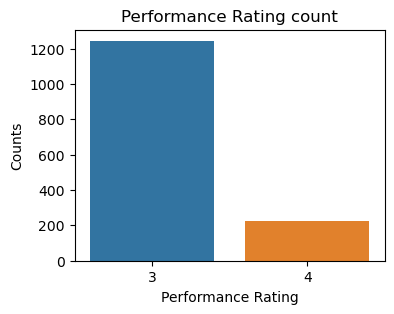

In [45]:
#Checking performance rating
plt.figure(figsize=(4,3))
sns.countplot(x="PerformanceRating", data=data)
plt.xlabel('Performance Rating')
plt.ylabel('Counts')
plt.title('Performance Rating count')


Most employees have been rated 3, very few employees have been awarded with 4 as rating

Text(0.5, 1.0, 'Training Times Last Year count')

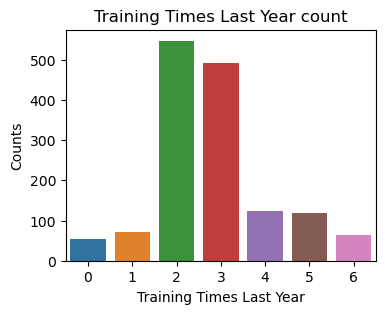

In [46]:
#Checking Training Times Last Year
plt.figure(figsize=(4,3))
sns.countplot(x="TrainingTimesLastYear", data=data)
plt.xlabel('Training Times Last Year')
plt.ylabel('Counts')
plt.title('Training Times Last Year count')


More number of employees have attended 2-3 numbers of trainings in the last year in comparison to the rest

In [6]:
#Converting object type data into integers for better analysis
from sklearn.preprocessing import LabelEncoder

In [7]:
lab_enc=LabelEncoder()

In [8]:
List=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in List:
    data[i]=lab_enc.fit_transform(data[i])

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

All the columns with object type data have now been converted into integers

In [52]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations-
1. There are no null values

 2.The standard deviation ranges from 0.7 to 602 which implies that the distribution is not in the same scale.

3. Few features like DailyRate, YearsAtCompany,YearsWithCurrManager etc seem to have outliers



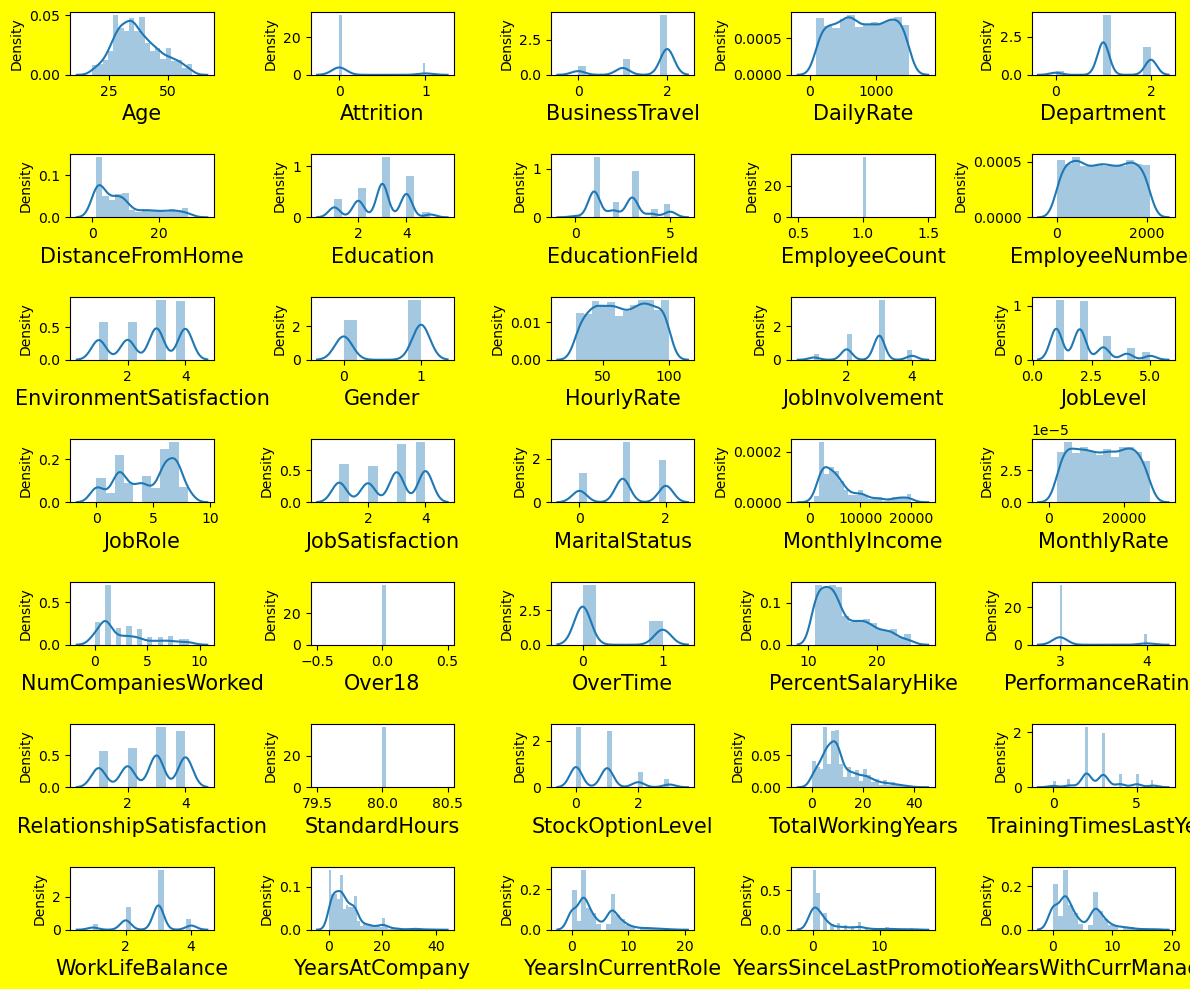

In [54]:
#let's find out more about the distribution through graphical representatioon
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

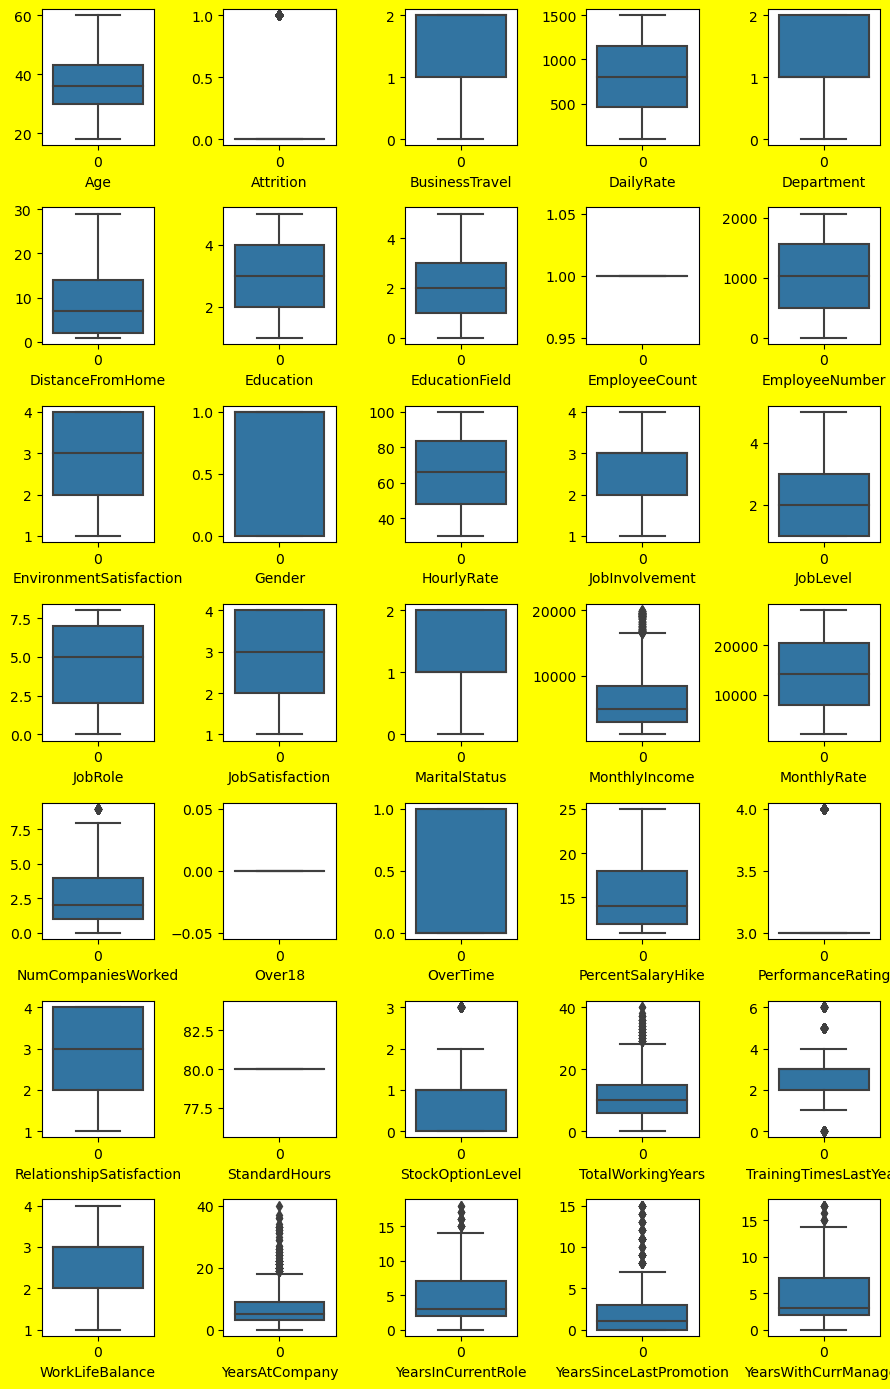

In [58]:
#Let's check for outliers
plt.figure(figsize=(9,14),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Features like YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TotalWorkingYears, StockOptionLevel, PerformanceRating and NumCompaniesWorked have outliers on the higher side while TrainingTimesLastYear has outliers both on higher and lower side. The outliers are required to be treated

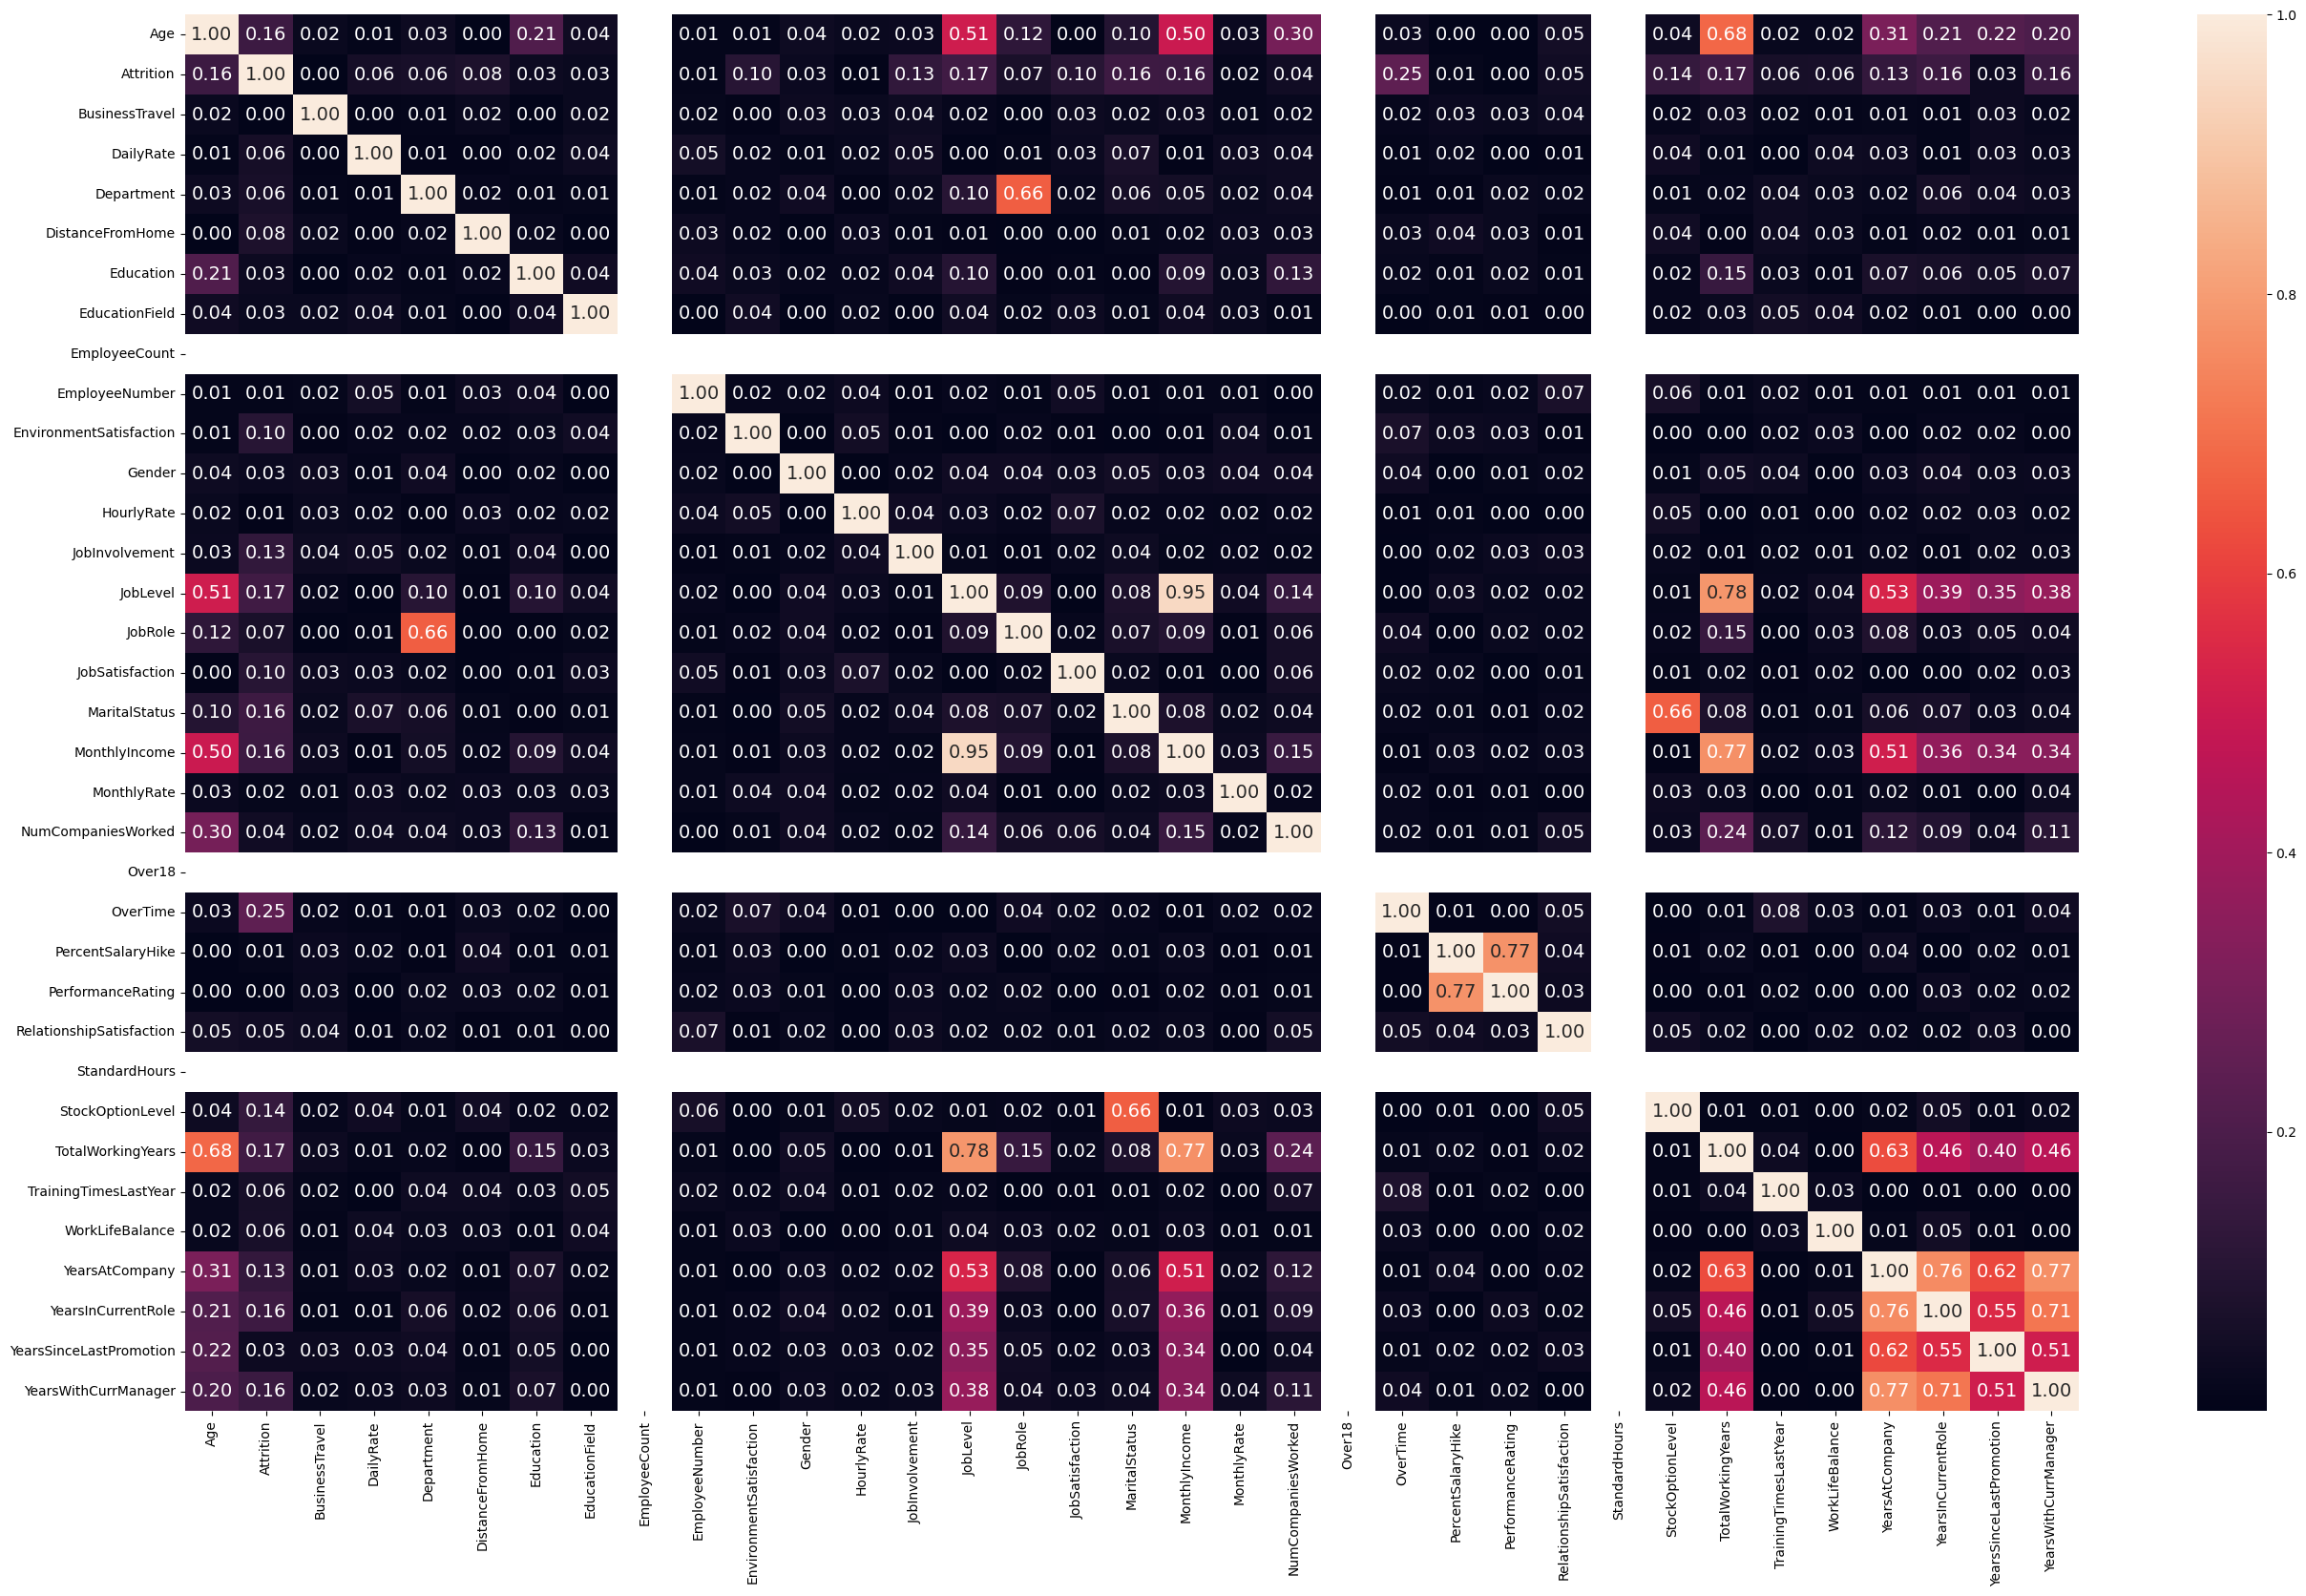

In [66]:
#Let's check correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(32,19))
sns.heatmap(data_corr, annot=True, fmt='0.2f',annot_kws={'size':14})
plt.show()


Features like JobLevel and MonthlyIncome, YearsAtCompany and YearsWithCurrManager, YearsAtCompany and YearsInCurrentRole, PerformanceRating and PercentSalaryHike, TotalWorkingYears and MonthlyIncome seem to be highly correlated

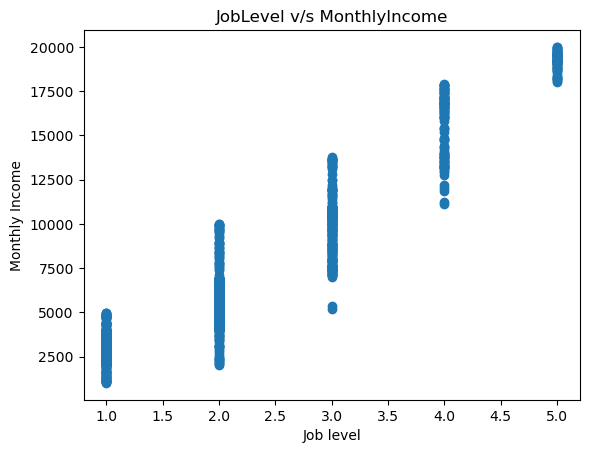

In [68]:
#Let's confirm our observation
plt.scatter(data.JobLevel, data.MonthlyIncome)
plt.xlabel('Job level')
plt.ylabel('Monthly Income')
plt.title('JobLevel v/s MonthlyIncome')
plt.show()

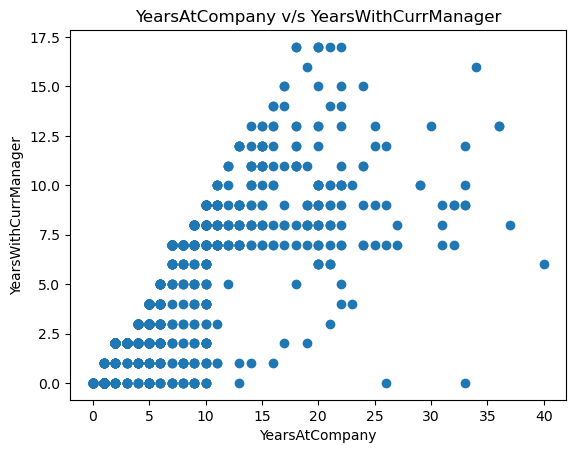

In [69]:
plt.scatter(data.YearsAtCompany, data.YearsWithCurrManager)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsWithCurrManager')
plt.title('YearsAtCompany v/s YearsWithCurrManager')
plt.show()

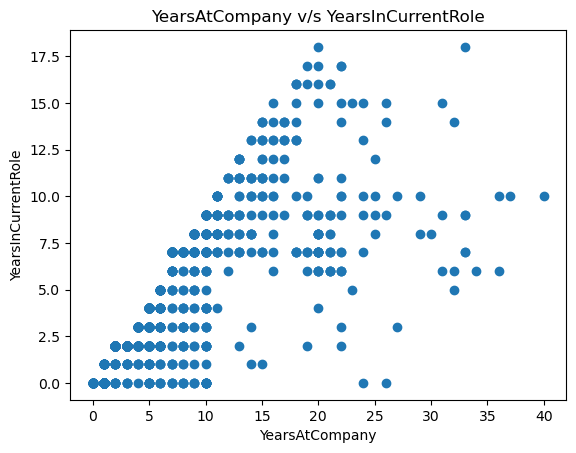

In [71]:
plt.scatter(data.YearsAtCompany, data.YearsInCurrentRole)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsInCurrentRole')
plt.title('YearsAtCompany v/s YearsInCurrentRole')
plt.show()

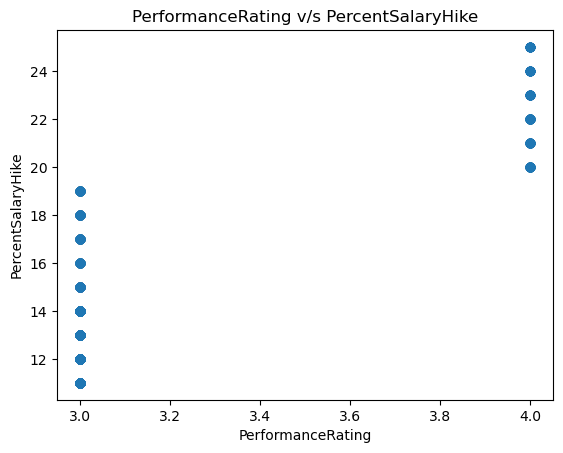

In [73]:
plt.scatter(data.PerformanceRating, data.PercentSalaryHike)
plt.xlabel('PerformanceRating')
plt.ylabel('PercentSalaryHike')
plt.title('PerformanceRating v/s PercentSalaryHike')
plt.show()

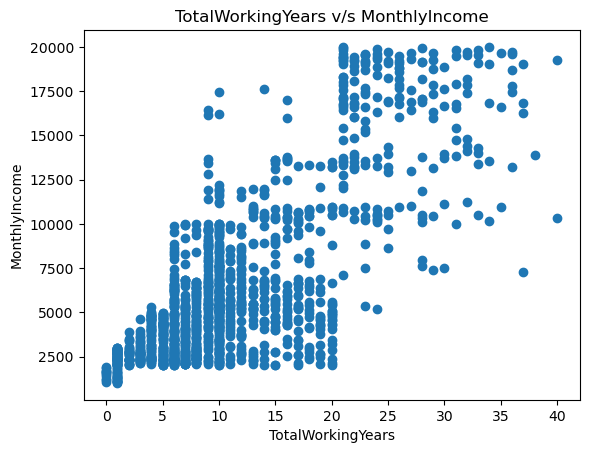

In [75]:
plt.scatter(data.TotalWorkingYears, data.MonthlyIncome)
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.title('TotalWorkingYears v/s MonthlyIncome')
plt.show()

We can now confirm that JobLevel and MonthlyIncome, YearsAtCompany and YearsWithCurrManager and PerformanceRating and PercentSalaryHike have strong correlation

In [76]:
#Checking realtion of features with the target graphicallty to select the required features
data.drop('Attrition',axis=1).corrwith(data.Attrition)

Age                        -0.159205
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

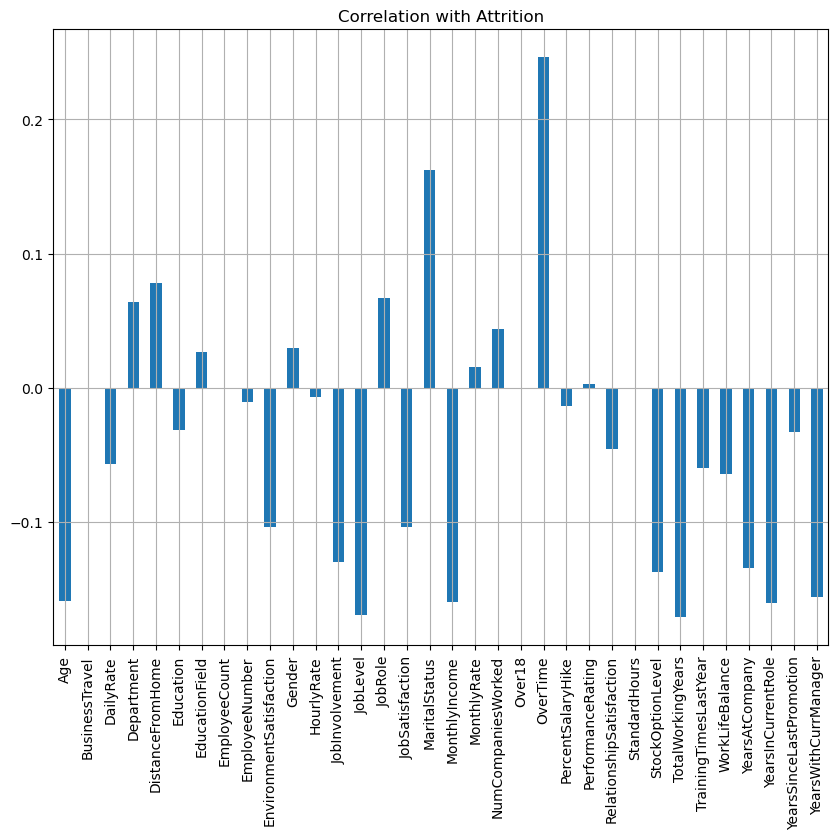

In [78]:
data.drop('Attrition',axis=1).corrwith(data.Attrition).plot(kind='bar',grid=True,figsize=(10,8),title="Correlation with Attrition")
plt.show()

In [11]:
#Eliminating correlated features and features that have least contribution in determining the target.
data.drop(columns=['BusinessTravel','EmployeeCount','Over18','PerformanceRating','StandardHours','YearsAtCompany'], axis=1, inplace=True)

In [12]:
data.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,1,11,1,0,8,0,1,4,0,5
1,49,0,279,1,8,1,1,2,3,1,...,0,23,4,1,10,3,3,7,1,7
2,37,1,1373,1,2,2,4,4,4,1,...,1,15,2,0,7,3,3,0,0,0
3,33,0,1392,1,3,4,1,5,4,0,...,1,11,3,0,8,3,3,7,3,0
4,27,0,591,1,2,1,3,7,1,1,...,0,12,4,1,6,3,3,2,2,2


In [13]:
#Treating Outliers
from scipy.stats import zscore


In [14]:
z_score=zscore(data[['YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears', 'StockOptionLevel','NumCompaniesWorked','TrainingTimesLastYear']])
abs_z_score=np.abs(z_score)
filt_nt=(abs_z_score<3).all(axis=1)
data=data[filt_nt]

In [15]:
data.describe()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,...,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,36.427150,0.164179,803.987207,1.260839,9.144989,2.897655,2.256574,1026.675195,2.717839,0.599147,...,0.283582,15.210377,2.700782,0.797441,10.546553,2.812367,2.761905,3.990050,1.821606,3.865672
std,8.913456,0.370570,403.788814,0.527530,8.077436,1.025029,1.337280,601.902865,1.093425,0.490246,...,0.450897,3.640663,1.080353,0.853105,6.980908,1.291857,0.706220,3.429213,2.563035,3.294853
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,1.000000,2.000000,2.000000,1.000000,492.500000,2.000000,0.000000,...,0.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,805.000000,1.000000,7.000000,3.000000,2.000000,1022.000000,3.000000,1.000000,...,0.000000,14.000000,3.000000,1.000000,9.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,1160.000000,2.000000,14.000000,4.000000,3.000000,1557.500000,4.000000,1.000000,...,1.000000,18.000000,4.000000,1.000000,14.000000,3.000000,3.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,...,1.000000,25.000000,4.000000,3.000000,34.000000,6.000000,4.000000,18.000000,11.000000,14.000000


In [16]:
#Handeling Skewness
data.skew().sort_values()

WorkLifeBalance            -0.560386
JobInvolvement             -0.509182
Gender                     -0.405055
JobRole                    -0.379444
JobSatisfaction            -0.341996
EnvironmentSatisfaction    -0.316262
RelationshipSatisfaction   -0.289335
Education                  -0.286306
MaritalStatus              -0.152762
HourlyRate                 -0.028902
DailyRate                  -0.010299
EmployeeNumber              0.019625
MonthlyRate                 0.032700
Department                  0.173951
Age                         0.454536
EducationField              0.546175
TrainingTimesLastYear       0.570243
YearsWithCurrManager        0.665860
PercentSalaryHike           0.803946
YearsInCurrentRole          0.907025
StockOptionLevel            0.957318
DistanceFromHome            0.960486
OverTime                    0.961311
NumCompaniesWorked          1.039537
TotalWorkingYears           1.059469
JobLevel                    1.111535
MonthlyIncome               1.508241
Y

In [17]:
nlist=["OverTime","DistanceFromHome","TotalWorkingYears","YearsInCurrentRole","StockOptionLevel","NumCompaniesWorked","JobLevel","MonthlyIncome","YearsSinceLastPromotion"]
for i in nlist:
    data[i]=np.log1p(data[i])

In [18]:
data.skew().sort_values()

TotalWorkingYears          -0.695199
WorkLifeBalance            -0.560386
JobInvolvement             -0.509182
Gender                     -0.405055
JobRole                    -0.379444
YearsInCurrentRole         -0.365901
JobSatisfaction            -0.341996
EnvironmentSatisfaction    -0.316262
RelationshipSatisfaction   -0.289335
Education                  -0.286306
MaritalStatus              -0.152762
HourlyRate                 -0.028902
DistanceFromHome           -0.025578
DailyRate                  -0.010299
EmployeeNumber              0.019625
MonthlyRate                 0.032700
NumCompaniesWorked          0.101484
Department                  0.173951
StockOptionLevel            0.264996
MonthlyIncome               0.319477
Age                         0.454536
JobLevel                    0.493258
EducationField              0.546175
TrainingTimesLastYear       0.570243
YearsWithCurrManager        0.665860
YearsSinceLastPromotion     0.689452
PercentSalaryHike           0.803946
O

The skewness in the distribution has been reduced now.

In [19]:
#Separating Features and label-
X=data.drop(columns=['Attrition'],axis=1)
y=data['Attrition']

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1407, dtype: int32

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
X_scaled

array([[ 0.51321012,  0.73830364,  1.40167326, ...,  0.34679564,
        -0.96751425,  0.34439527],
       [ 1.41104864, -1.3006152 , -0.49462893, ...,  0.94711013,
        -0.04140315,  0.95161851],
       [ 0.06429085,  1.40968518, -0.49462893, ..., -1.708867  ,
        -0.96751425, -1.17366283],
       ...,
       [-1.0580073 , -1.60781561, -0.49462893, ..., -0.30565895,
        -0.96751425, -0.26282797],
       [ 1.41104864,  0.54258725,  1.40167326, ...,  0.77655649,
        -0.96751425,  1.25523013],
       [-0.27239859, -0.43599469, -0.49462893, ...,  0.06178442,
        -0.04140315, -0.56643959]])

In [25]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.30,random_state=85)

In [32]:
#Handling imbalanced dataset(for label Attrition)
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
over_smp=SMOTE(random_state=85, k_neighbors=3, sampling_strategy=0.70)

In [29]:
X_train_ns,y_train_ns=over_smp.fit_resample(X_train,y_train)

In [33]:
print("The number of class before resampling{}".format(Counter(y_train)))
print("The number of class after resampling{}".format(Counter(y_train_ns)))

The number of class before resamplingCounter({0: 818, 1: 166})
The number of class after resamplingCounter({0: 818, 1: 572})


The balance of the count of employees in classes(for label) seems much more balanced than before

MODEL BUILDING

In [36]:
#Writing one function to call it for multiple models

def metric_score(clf, X_train_ns, X_test, y_train_ns,y_test, train=True):
    if train:
        y_pred=clf.predict(X_train_ns)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train_ns,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
              print('\n\n Test Classification Report\n', classification_report(y_test,pred, digits=2))

In [40]:
#Using K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [41]:
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [42]:
metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False)



---------------Train Result-------------
Accuracy Score:87.19%

---------------Test Result-------------
Accuracy Score:68.09%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.70      0.79       358
           1       0.26      0.60      0.37        65

    accuracy                           0.68       423
   macro avg       0.58      0.65      0.58       423
weighted avg       0.81      0.68      0.72       423



In [46]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [47]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8208955223880597


 at 4, cross val score is 0.8244625744625744


 at 5, cross val score is 0.8123545594507963




In [48]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [50]:
metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False)



---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:77.07%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       358
           1       0.31      0.42      0.36        65

    accuracy                           0.77       423
   macro avg       0.60      0.63      0.61       423
weighted avg       0.80      0.77      0.78       423



In [51]:
for k in range(3,6):
    cv_score=cross_val_score(dt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7739872068230277


 at 4, cross val score is 0.7846453315203314


 at 5, cross val score is 0.7796673481234698




In [52]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [53]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [54]:
metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False)



---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:86.05%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       358
           1       0.62      0.23      0.34        65

    accuracy                           0.86       423
   macro avg       0.75      0.60      0.63       423
weighted avg       0.84      0.86      0.83       423



In [55]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8550106609808102


 at 4, cross val score is 0.8507470538720538


 at 5, cross val score is 0.8592715983947906




In [56]:
#Using Gradient Vossting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [57]:
gbdt.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [58]:
metric_score(gbdt,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(gbdt,X_train_ns,X_test,y_train_ns,y_test,train=False)


---------------Train Result-------------
Accuracy Score:96.62%

---------------Test Result-------------
Accuracy Score:87.71%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       358
           1       0.67      0.40      0.50        65

    accuracy                           0.88       423
   macro avg       0.78      0.68      0.71       423
weighted avg       0.86      0.88      0.86       423



In [59]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8614072494669509


 at 4, cross val score is 0.8614105801605801


 at 5, cross val score is 0.8578481108503068




In [60]:
#Using XGBoost
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.9 MB/s eta 0:00:00


In [61]:
import xgboost as xgb

In [63]:
xgb=xgb.XGBClassifier()

In [64]:
xgb.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:88.18%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       358
           1       0.73      0.37      0.49        65

    accuracy                           0.88       423
   macro avg       0.81      0.67      0.71       423
weighted avg       0.87      0.88      0.87       423



In [66]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8542999289267946


 at 4, cross val score is 0.85003885003885


 at 5, cross val score is 0.8571363670780647




We are getting the highest test score with XGBoost model which is 88% and Cross validation score at CV 4 is 85%. 
However, Gradient Boosting model is also performing well with 87.7% accuracy score and and Cross validation score at CV 4 is 86%.
Gradient Boosting model seems to be a better choice as the difference between train and test score is lesser and CV score ia also better than XGBoost. 
Hence, we will be going with Gradient Boosting model as our final model.

In [68]:
#Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV


In [69]:
grid_param={
          'n_estimators':[10,30,50],
          'max_leaf_nodes':range(5,15),
          'max_depth':range(3,10),
          'min_samples_leaf':range(2,6)}

In [70]:
grid_search=GridSearchCV(estimator=gbdt,
                        param_grid=grid_param,
                        cv=4,
                        n_jobs=1)

In [71]:
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'max_depth': range(3, 10),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'n_estimators': [10, 30, 50]})

In [72]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'max_depth': 4, 'max_leaf_nodes': 12, 'min_samples_leaf': 5, 'n_estimators': 50}


In [77]:
Final_model= GradientBoostingClassifier(max_depth=4, max_leaf_nodes=12, min_samples_leaf=5, n_estimators=50)

In [78]:
Final_model.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=12, min_samples_leaf=5,
                           n_estimators=50)

In [79]:
metric_score(Final_model,X_train_ns,X_test,y_train_ns,y_test,train=True)
metric_score(Final_model,X_train_ns,X_test,y_train_ns,y_test,train=False)


---------------Train Result-------------
Accuracy Score:95.83%

---------------Test Result-------------
Accuracy Score:87.47%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       358
           1       0.67      0.37      0.48        65

    accuracy                           0.87       423
   macro avg       0.78      0.67      0.70       423
weighted avg       0.86      0.87      0.86       423



In [87]:
y_pred = Final_model.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'GBDT predicted': y_pred})

In [88]:
data1

,Actual,GBDT predicted
30,0,0
1158,0,0
999,0,0
1057,1,1
1036,1,1
...,...,...
655,0,1
25,0,0
997,1,0
1007,1,0


In [82]:
#saving and loading data
import joblib

In [83]:
joblib.dump(Final_model,"HR Analytics")

['HR Analytics']

In [84]:
model = joblib.load("HR Analytics")